In [3]:
import pandas as pd
from math import isnan
    
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
all = [train_df, test_df]

print(train_df.columns.values)
important_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                      'Fare', 'Cabin', 'Embarked']
non_numerical_features = ['Sex', 'Pclass', 'Embarked']


def is_nan_not_str(x):
    if isinstance(x, str):
        return False
    else:
     return isnan(x)

# converting non-numerical-features to numerical 

train_df['Sex'] = train_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train_df['Embarked'] = \
train_df['Embarked'].apply(lambda x: x if is_nan_not_str(x) else {'S': 0,
                                                                  'C': 1,
                                                                  'Q': 2}[x])

# function to convert cabin name to floats. 
def cabin_to_float(cabin_str):
    res = 0
    for cabin_str_split in cabin_str.split(' '):
        if len(cabin_str_split) > 1:
            res += ord(cabin_str_split[0:1]) * int(cabin_str_split[1:])
        else:
            res += ord(cabin_str_split[0:1])

    return res

train_df['Cabin'] = train_df['Cabin'].apply(lambda x: x if is_nan_not_str(x) 
                                                        else cabin_to_float(x))

# making a visualization of features that have NaN and filling then with 
#   average value

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import isnan

# find all features that have cell that are nans and filling nans with value 
# average values
features_with_nan = [it for it in important_features 
                     if len(train_df[it].isnull().unique()) > 1]

np.random.seed(42)

def fill_feature_na_with_distribution(df, feature_name):
    sample = df[feature_name].dropna()
    mean_f0 = sample.mean()
    std_f0 = np.std(sample)
    amount_nan_f0 = len(df[feature_name]) - len(sample) 
    dist_f0 = np.random.normal(loc=mean_f0, scale=std_f0, size=amount_nan_f0)
    nan_count = 0
    for k, v in enumerate(df[feature_name]):
        if isnan(v):
            df[feature_name][k] = dist_f0[nan_count]
            nan_count += 1
    #return df
    
for feature in features_with_nan: 
 # train_df[feature_name] = \
    print('cleaning {}'.format(feature))
    fill_feature_na_with_distribution(train_df, feature)

print('cleaned data')

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
cleaning Age
cleaning Cabin
cleaning Embarked
cleaned data


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


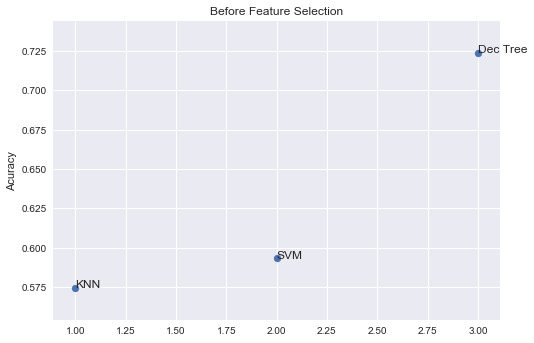

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clfs = [KNeighborsClassifier(n_neighbors = 3),
        SVC(C=1.0, kernel='rbf'),
        DecisionTreeClassifier()]

all_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                'Fare', 'Cabin', 'Embarked']
X = train_df[all_features]

y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=42)

clfs_res = []
for c in clfs:
    c.fit(X_train.values, y_train.values)
    y_pred = c.predict(X_test.values)
    val = accuracy_score(y_test.values, y_pred)
    clfs_res.append(val)

fig, ax = plt.subplots()
plt.title('Before Feature Selection')
plt.ylabel('Accuracy')
ax.scatter([1, 2, 3], clfs_res)
ax.annotate('KNN', (1, clfs_res[0]))
ax.annotate('SVM', (2, clfs_res[1]))
ax.annotate('Dec Tree', (3, clfs_res[2]))
plt.show()


['radius_se', 'radius_worst', 'smoothness_se', 'concavity_mean', 'perimeter_se', 'area_mean']


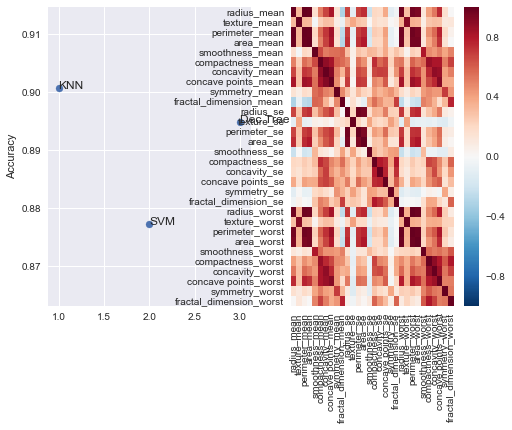

In [48]:
from skfeature.function.statistical_based import CFS 

choosen_features = CFS.cfs(X_train.values, y_train.values)
choosen_features = [all_features[x] for x in choosen_features]


print('all -> {} \n choosen -> {}'.format(all_features, 
                                          choosen_features))

clfs_res = []
for c in clfs:
    c.fit(X_train[choosen_features].values, y_train.values)
    y_pred = c.predict(X_test[choosen_features].values)
    val = accuracy_score(y_test.values, y_pred)
    clfs_res.append(val)

fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].set_ylabel('Accuracy')
ax[0].scatter([1, 2, 3], clfs_res)
ax[0].annotate('KNN', (1, clfs_res[0]))
ax[0].annotate('SVM', (2, clfs_res[1]))
ax[0].annotate('Dec Tree', (3, clfs_res[2]))

corr = X.corr()
sns.heatmap(corr, ax=ax[1])

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


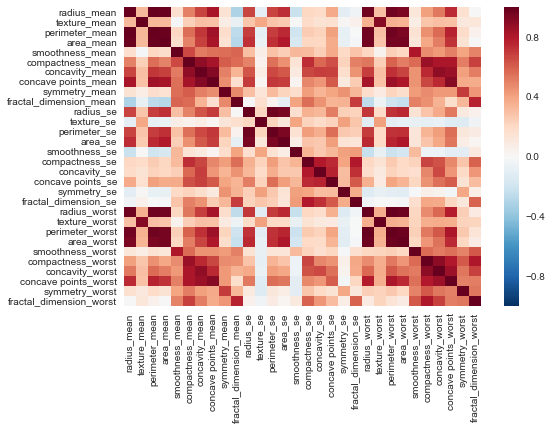

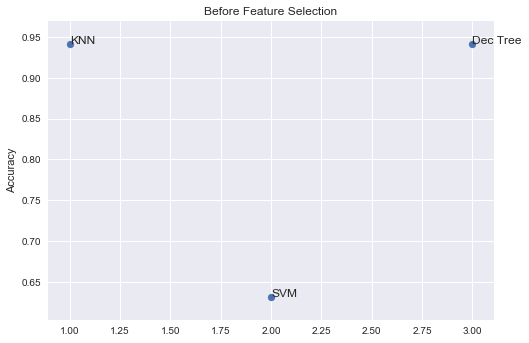

all -> Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') 
 choosen -> ['radius_se', 'radius_worst', 'smoothness_se', 'concavity_mean', 'perimeter_se', 'area_mean']


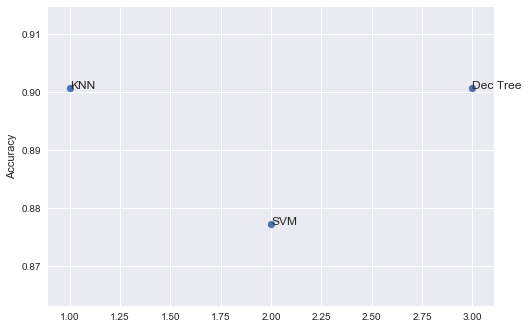

In [49]:
train_breast = pd.read_csv('../breast-cancer/data.csv')
all_features = train_breast.keys()[2:]
all_features = all_features[:len(all_features) - 1]

X = train_breast[all_features]

for feature in all_features:
    X[feature].fillna(X[feature].dropna().median(), inplace=True)

y = train_breast['diagnosis'].map({'B':1, 'M':0}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=42)

corr = X.corr()
sns.heatmap(corr)
plt.show()

clfs_res = []
for c in clfs:
    c.fit(X_train.values, y_train.values)
    y_pred = c.predict(X_test.values)
    val = accuracy_score(y_test.values, y_pred)
    clfs_res.append(val)

fig, ax = plt.subplots()
plt.title('Before Feature Selection')
plt.ylabel('Accuracy')
ax.scatter([1, 2, 3], clfs_res)
ax.annotate('KNN', (1, clfs_res[0]))
ax.annotate('SVM', (2, clfs_res[1]))
ax.annotate('Dec Tree', (3, clfs_res[2]))
plt.show()

from skfeature.function.statistical_based import CFS 

choosen_features = CFS.cfs(X_train.values, y_train.values)
choosen_features = [all_features[x] for x in choosen_features]

print('all -> {} \n choosen -> {}'.format(all_features, 
                                          choosen_features))

clfs_res = []
for c in clfs:
    c.fit(X_train[choosen_features].values, y_train.values)
    y_pred = c.predict(X_test[choosen_features].values)
    val = accuracy_score(y_test.values, y_pred)
    clfs_res.append(val)

plt.ylabel('Accuracy')
plt.scatter([1, 2, 3], clfs_res)
plt.annotate('KNN', (1, clfs_res[0]))
plt.annotate('SVM', (2, clfs_res[1]))
plt.annotate('Dec Tree', (3, clfs_res[2]))
plt.show()